# Gradient Descent from Scratch

In [66]:
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 80

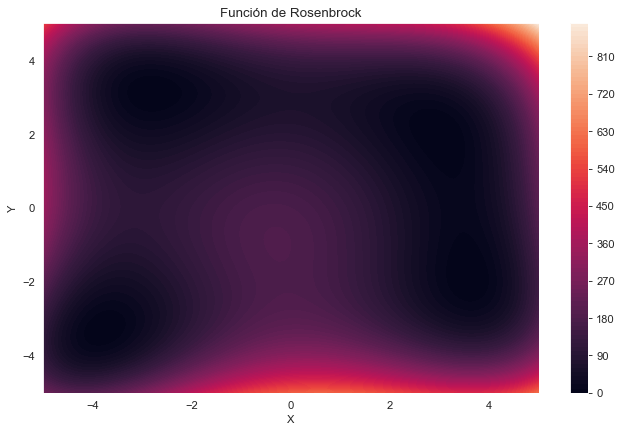

In [68]:
rosenbrock = lambda theta: (theta[0]**2 + theta[1] - 11)**2 + (theta[0] + theta[1]**2 - 7)**2

_X = np.linspace(-5, 5, 100)
_Y = np.linspace(-5, 5, 100)

_X, _Y = np.meshgrid(_X, _Y)

_Z = rosenbrock([_X, _Y])

plt.figure(figsize=(10, 6))

plt.contourf(_X, _Y, _Z, 100)
plt.colorbar()
plt.title('Función de Rosenbrock')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [69]:
# print in 3d
from plotly import graph_objects as go

fig = go.Figure(data=[go.Surface(z=_Z)])
fig.update_layout(
    title='Función de Rosenbrock',
    autosize=True,
    width=800,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

fig.show()

## Stochastic Gradient Descent (SGD)

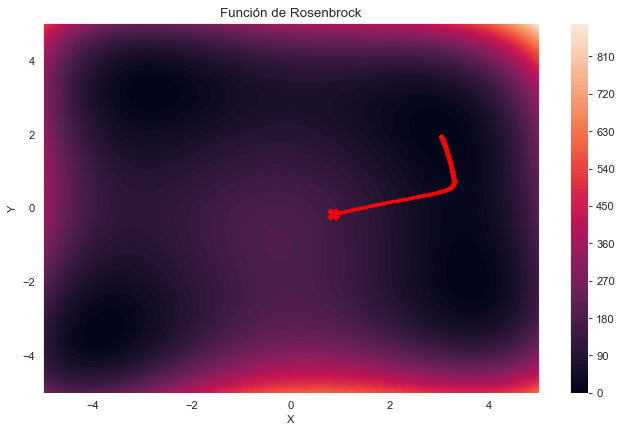

In [70]:
rosenbrock_der = lambda theta: np.array([
    4*theta[0]*(theta[0]**2 + theta[1] - 11) + 2*(theta[0] + theta[1]**2 - 7),
    2*(theta[0]**2 + theta[1] - 11) + 4*theta[1]*(theta[0] + theta[1]**2 - 7)
])

theta = np.random.rand(2) * 8 - 4
history = np.array([theta])
learning_rate = 0.0005

for _ in range(500):
    # theta = theta - learning_rate * rosenbrock_der(theta)
    # history = np.append(history, [theta], axis=0)
    theta[0] = theta[0] - learning_rate * rosenbrock_der(theta)[0]
    theta[1] = theta[1] - learning_rate * rosenbrock_der(theta)[1]

    history = np.append(history, [theta], axis=0)

plt.figure(figsize=(10, 6))

plt.contourf(_X, _Y, _Z, 100)
plt.colorbar()
plt.title('Función de Rosenbrock')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(history[0, 0], history[0, 1], c='r', marker='X', s=100)
plt.scatter(history[1:, 0], history[1:, 1], c='r', s=5)
plt.show()

In [71]:
def SGD(theta, lr, grad_func, epochs):
    history = np.array([theta])
    for _ in range(epochs):
        theta = theta - lr * grad_func(theta)
        history = np.append(history, [theta], axis=0)
    return history

## Momentum

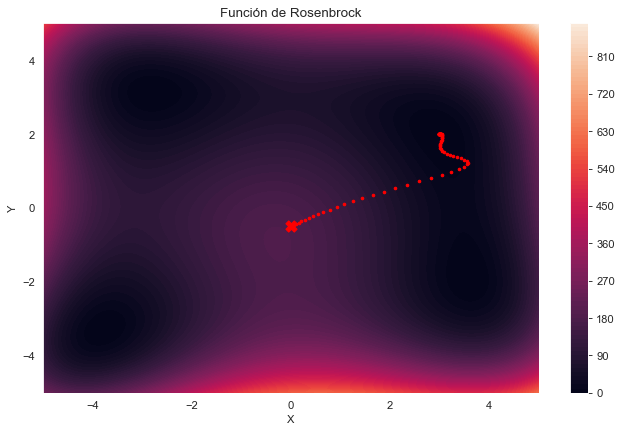

In [72]:
# with momentum
# theta = np.random.rand(2) * 8 - 4
theta = np.array([0, -0.5])
history = np.array([theta])
learning_rate = 0.0005
mu = 0.8

v = np.zeros_like(theta)

for _ in range(500):
    v = mu * v + (1 + mu) * rosenbrock_der(theta)
    theta = theta - learning_rate * v

    history = np.append(history, [theta], axis=0)

plt.figure(figsize=(10, 6))

plt.contourf(_X, _Y, _Z, 100)
plt.colorbar()
plt.title('Función de Rosenbrock')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(history[0, 0], history[0, 1], c='r', marker='X', s=100)
plt.scatter(history[1:, 0], history[1:, 1], c='r', s=5)
plt.show()

In [73]:
def momentum(theta, lr, grad_func, epochs, mu=0.9):
    history = np.array([theta])
    v = np.zeros_like(theta)
    for _ in range(epochs):
        v = mu * v + (1 + mu) * grad_func(theta)
        theta = theta - lr * v
        history = np.append(history, [theta], axis=0)
    return history

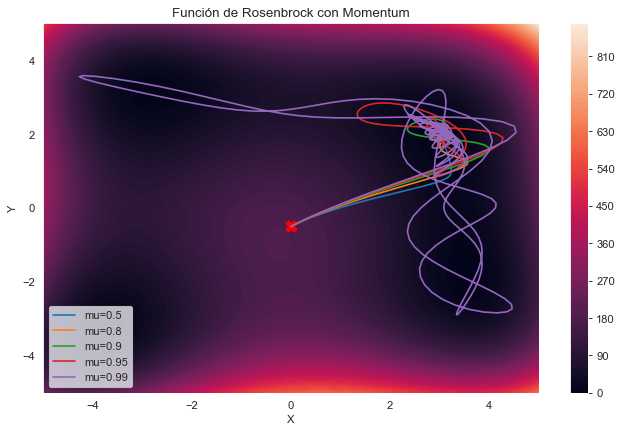

In [74]:
# comparación

# theta = np.random.rand(2) * 8 - 4
theta = np.array([0, -0.5])
history = np.array([theta])
learning_rate = 0.0005
mu = [0.5, 0.8, 0.9, 0.95, 0.99]

plt.figure(figsize=(10, 6))

plt.contourf(_X, _Y, _Z, 100)
plt.colorbar()
plt.title('Función de Rosenbrock con Momentum')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(history[0, 0], history[0, 1], c='r', marker='X', s=100)
plt.scatter(history[1:, 0], history[1:, 1], c='r', s=5)

for m in mu:
    history = momentum(theta, learning_rate, rosenbrock_der, 500, mu=m)
    plt.plot(history[:, 0], history[:, 1], label=f'mu={m}')

plt.legend()
plt.show()


## Gradient Descent with Nesterov Momentum

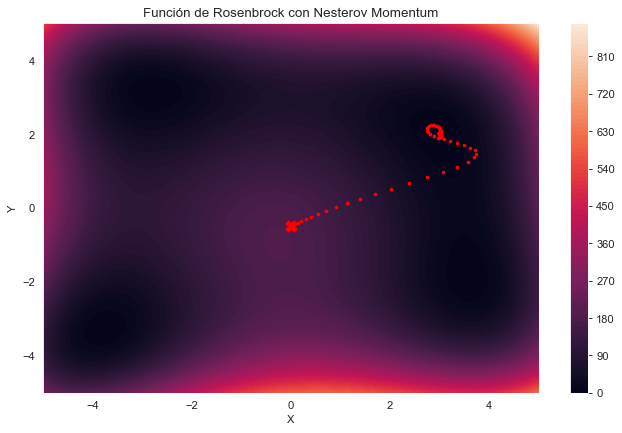

In [75]:
# theta = np.random.randn(2,1)  # random initialization
theta = np.array([0, -0.5])
history = np.array([theta])
learning_rate = 0.001
mu = 0.9

v = np.zeros_like(theta)

for _ in range(500):
    v = mu * v - learning_rate * rosenbrock_der(theta + mu * v)
    theta = theta + v

    history = np.append(history, [theta], axis=0)

plt.figure(figsize=(10, 6))

plt.contourf(_X, _Y, _Z, 100)
plt.colorbar()
plt.title('Función de Rosenbrock con Nesterov Momentum')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(history[0, 0], history[0, 1], c='r', marker='X', s=100)
plt.scatter(history[1:, 0], history[1:, 1], c='r', s=5)
plt.show()


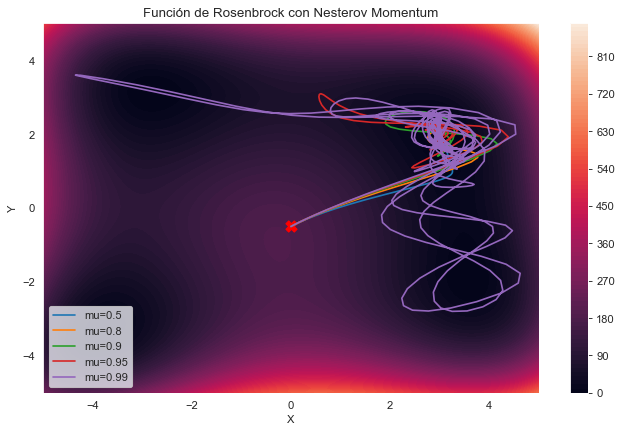

In [76]:
theta = np.array([0, -0.5])
history = np.array([theta])
learning_rate = 0.001
mu = [0.5, 0.8, 0.9, 0.95, 0.99]

plt.figure(figsize=(10, 6))

plt.contourf(_X, _Y, _Z, 100)
plt.colorbar()
plt.title('Función de Rosenbrock con Nesterov Momentum')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(history[0, 0], history[0, 1], c='r', marker='X', s=100)
plt.scatter(history[1:, 0], history[1:, 1], c='r', s=5)

for m in mu:
    history = momentum(theta, learning_rate, rosenbrock_der, 500, mu=m)
    plt.plot(history[:, 0], history[:, 1], label=f'mu={m}')

plt.legend()
plt.show()

In [77]:
def nesterov(theta, lr, grad_func, epochs, mu=0.9):
    history = np.array([theta])
    v = np.zeros_like(theta)
    for _ in range(epochs):
        v = mu * v - lr * grad_func(theta + mu * v)
        theta = theta + v
        history = np.append(history, [theta], axis=0)
    return history

## Adagrad

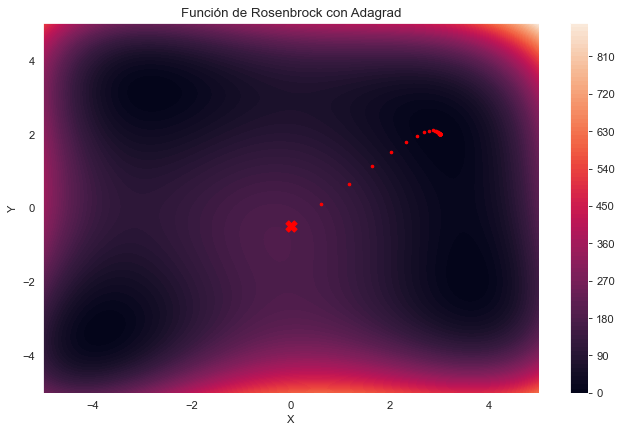

In [78]:
#adagrad
theta = np.array([0, -0.5])
history = np.array([theta])
learning_rate = 0.6
eps = 1e-8

grad_squared = np.zeros_like(theta)

for _ in range(500):
    # grad = rosenbrock_der(theta)
    # grad_squared += grad**2
    # theta = theta - learning_rate * grad / (np.sqrt(grad_squared) + eps)

    grad = rosenbrock_der(theta)
    grad_squared += grad**2
    n = learning_rate / (np.sqrt(grad_squared + eps))
    theta = theta - n * grad

    history = np.append(history, [theta], axis=0)

plt.figure(figsize=(10, 6))

plt.contourf(_X, _Y, _Z, 100)
plt.colorbar()
plt.title('Función de Rosenbrock con Adagrad')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(history[0, 0], history[0, 1], c='r', marker='X', s=100)
plt.scatter(history[1:, 0], history[1:, 1], c='r', s=5)
plt.show()

In [79]:
def adagrad(theta, lr, grad_func, epochs, eps=1e-8):
    history = np.array([theta])
    grad_squared = np.zeros_like(theta)
    for _ in range(epochs):
        grad = grad_func(theta)
        grad_squared += grad**2
        n = lr / (np.sqrt(grad_squared + eps))
        theta = theta - n * grad
        history = np.append(history, [theta], axis=0)
    return history

# Comparation of the different optimization algorithms

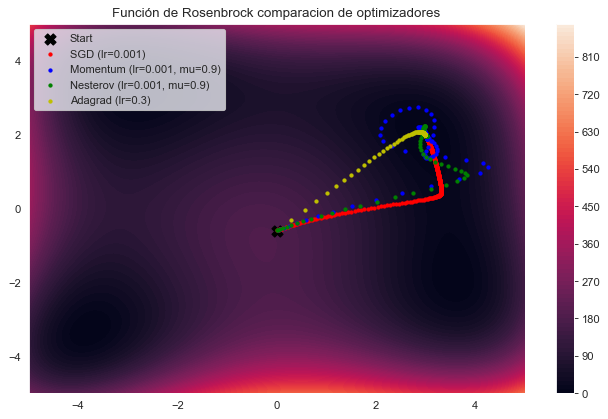

In [80]:
theta = np.array([0, -0.6])
learning_rate = 0.001

sgd = SGD(theta, learning_rate, rosenbrock_der, 500)
moment = momentum(theta, learning_rate, rosenbrock_der, 500)
nest = nesterov(theta, learning_rate, rosenbrock_der, 500)
adag = adagrad(theta, 0.3, rosenbrock_der, 500)

plt.figure(figsize=(10, 6))

plt.contourf(_X, _Y, _Z, 100)
plt.colorbar()
plt.title('Función de Rosenbrock comparacion de optimizadores')
plt.scatter(theta[0], theta[1], c='k', marker='X', s=100, label='Start')
plt.scatter(sgd[1:, 0], sgd[1:, 1], c='r', s=8, label=f'SGD (lr={learning_rate})')
plt.scatter(moment[1:, 0], moment[1:, 1], c='b', s=8, label=f'Momentum (lr={learning_rate}, mu=0.9)')
plt.scatter(nest[1:, 0], nest[1:, 1], c='g', s=8, label=f'Nesterov (lr={learning_rate}, mu=0.9)')
plt.scatter(adag[1:, 0], adag[1:, 1], c='y', s=8, label=f'Adagrad (lr={0.3})')
plt.legend()
plt.show()